In [1]:
## Referred from::  https://www.youtube.com/watch?v=OUMDUq5OJLg&t=3297s
## A simple implementation of ANN for MNIST
import random
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras import backend as K
#Image Dimension:::  In Tensorflow:(64,64,3)     ..In THEANO:(3,64,64) i.e. channel goes first
K.set_image_dim_ordering('tf')  # always check u r using the correct image dimension
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
## Set the full path to mnist.pkl.gz
## Point this to the data folder inside the repository
path_to_dataset = "./mnist.pkl.gz"

In [3]:
## Load the dataset
(X_train,y_train),(X_test, y_test) = mnist.load_data(path_to_dataset)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print(X_train.shape[0],'train_samples')
print(X_test.shape[0],'test_samples')


60000 train_samples
10000 test_samples


In [6]:
batch_size = 128
nb_classes =10
nb_epochs = 10

# convert class vectors to binary class matrices for softmax layer
Y_train = keras.utils.np_utils.to_categorical(y_train,nb_classes)
Y_test = keras.utils.np_utils.to_categorical(y_test,nb_classes)
## for example 6's label is now [0,0,0,0,0,0,0,0]

print(Y_train.shape)

(60000, 10)


MODEL DEFINITION

In [7]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

MODEL COMPILATION

In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [10]:
history = model.fit(X_train,Y_train,
                   batch_size=batch_size,nb_epoch=nb_epochs,
                   verbose=1,validation_data=(X_test,Y_test))

C:\Users\prassha\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.2461 - acc: 0.9249 - val_loss: 0.1220 - val_acc: 0.9643
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.1016 - acc: 0.9695 - val_loss: 0.0796 - val_acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.0753 - acc: 0.9769 - val_loss: 0.0780 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.0598 - acc: 0.9820 - val_loss: 0.0790 - val_acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.0511 - acc: 0.9851 - val_loss: 0.0878 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.0446 - acc: 0.9871 - val_loss: 0.0822 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.0382 - acc: 0.9883 - val_loss: 0.0867 - val_acc: 0.9795
Epoch 8/10
60000/60000 [==============================

In [11]:
## we can check the param of the model after training
history.params

{'batch_size': 128,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'verbose': 1}

In [12]:
history.history

{'acc': [0.92489999996821082,
  0.96948333330154424,
  0.9768833333015442,
  0.98198333336512245,
  0.98513333330154418,
  0.98706666663487752,
  0.98824999999999996,
  0.98981666663487755,
  0.99033333330154416,
  0.99106666669845578],
 'loss': [0.24612813951969148,
  0.10162155381937822,
  0.075253502432505295,
  0.059845059924572709,
  0.051077378912766772,
  0.044595771386101844,
  0.038168247671052813,
  0.036023207616185146,
  0.033611033290376263,
  0.030619467217770095],
 'val_acc': [0.96430000000000005,
  0.97550000000000003,
  0.97689999999999999,
  0.97970000000000002,
  0.97829999999999995,
  0.9798,
  0.97950000000000004,
  0.98299999999999998,
  0.98329999999999995,
  0.98140000000000005],
 'val_loss': [0.12198462744057179,
  0.079612369871139524,
  0.07797599339000881,
  0.078980979344202201,
  0.087764144134812525,
  0.082223362440551867,
  0.086683350652601798,
  0.076163489398606912,
  0.085442581455010991,
  0.09189635857955436]}

EVALUATION AND PREDICTION

In [13]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0])
print('Test accuracy:',score[1])

Test score: 0.0918963650424
Test accuracy: 0.9814


Now lets predict one single sample

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


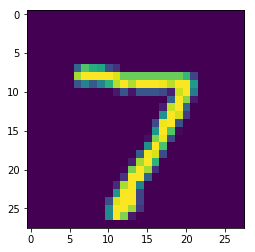

In [14]:
X_test_0 = X_test[0,:].reshape(1,784)
Y_test_0 = Y_test[0,:]
print(Y_test_0)
plt.imshow(X_test_0.reshape(28,28))

In [15]:
pred = model.predict(X_test_0)
print('Label of testing sample:', np.argmax(Y_test_0))
print('\nOutput of the softmax layer:',pred[0])
print('\nNeural Network prediction:', np.argmax(pred[0]))


Label of testing sample: 7

Output of the softmax layer: [  5.73783546e-22   6.71347726e-16   1.05548307e-12   2.31721398e-09
   1.09942386e-25   3.00724564e-15   5.04636227e-30   1.00000000e+00
   8.53120150e-15   1.80906261e-13]

Neural Network prediction: 7
